### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [314]:
data = pd.read_csv('data/coupons.csv')

In [315]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [317]:
missing_vals=data.isnull().sum()
print(missing_vals)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [318]:
#calculating percentage of missing data
# percent of missing "car" 
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))

# percent of missing "Bar" 
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))

# percent of missing "CoffeeHouse" 
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))

# percent of missing "CarryAway" 
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))

# percent of missing "RestaurantLessThan20" 
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))

# percent of missing "Restaurant20To50" 
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))


Percent of missing "car" records is 99.15%
Percent of missing "Bar" records is 0.84%
Percent of missing "CoffeeHouse" records is 1.71%
Percent of missing "CarryAway" records is 1.19%
Percent of missing "RestaurantLessThan20" records is 1.02%
Percent of missing "Restaurant20To50" records is 1.49%


In [319]:
#I am checking values in 'car' column to understand how important is this column.
data["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [320]:
# I decided to:
# * drop 'car' column because 99.15%  data is missing plus I don't think this column will have tremendous 
#   impact on the final results (e.g. having or not car or car brand)
# * keep other columns, becuase only less than 1.5% values for each column are missing.
# * keep rows with missing values because this might contribute in the worse case scenerio to 
#.  6.25%loss of valuable data.
# * replace the missing values in each column

In [321]:
#Dropping 'car' column 
data.drop('car', axis=1, inplace=True)

In [322]:
#I looked at values and their quantities in each column with missing values.
#I decided to fill these columns with the most popular value for each column
data["Bar"].fillna(data['Bar'].value_counts().idxmax(), inplace=True)
data["CoffeeHouse"].fillna(data['CoffeeHouse'].value_counts().idxmax(), inplace=True)
data["CarryAway"].fillna(data['CarryAway'].value_counts().idxmax(), inplace=True)
data["RestaurantLessThan20"].fillna(data['RestaurantLessThan20'].value_counts().idxmax(), inplace=True)
data["Restaurant20To50"].fillna(data['Restaurant20To50'].value_counts().idxmax(), inplace=True)

In [323]:
#Double checking if everything went well and there are no longer misssing values and 'car' column doesn't exist
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [324]:
# Since column'Y' has values of 0 and 1, where 1 means accepted coupon, I can sum the values for the column to figure 
# out how many people accepted coupon.  
yes_coupon=data['Y'].sum()
proportion_of_the_total_observations = yes_coupon/len(data.index)*100
print("The proportion of he total observations that chose to accept the coupon is",proportion_of_the_total_observations,"%.")


The proportion of he total observations that chose to accept the coupon is 56.84326710816777 %.


5. Use a bar plot to visualize the `coupon` column.

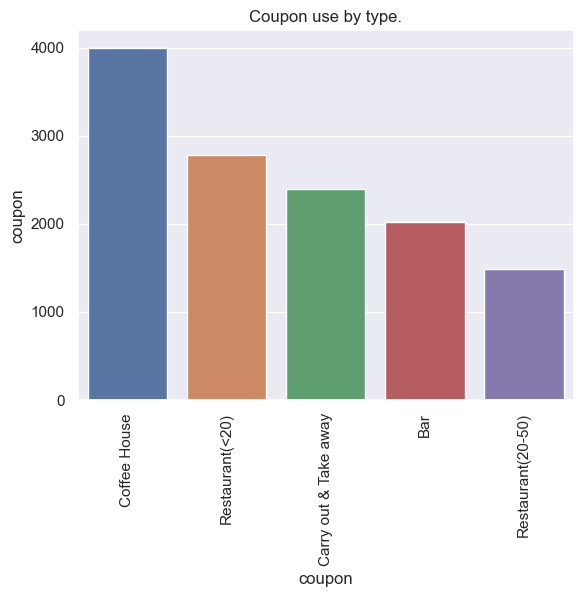

In [325]:
sns.barplot(data=data, x = "coupon", y = data.coupon.value_counts())
sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts()).set(title='Coupon use by type.')
plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
plt.show()

6. Use a histogram to visualize the temperature column.

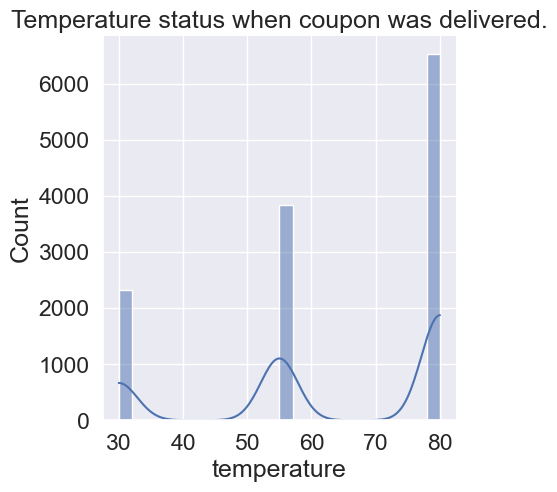

In [326]:
sns.displot(data=data, x='temperature', kde=True).set(title='Temperature status when coupon was delivered.')
sns.set(font_scale = 1.2)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [327]:
bar_df = data.copy()
bar_df.drop(['CoffeeHouse','RestaurantLessThan20', 'CarryAway', 'Restaurant20To50'], axis=1, inplace=True)
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        12684 non-null  object
 1   passanger          12684 non-null  object
 2   weather            12684 non-null  object
 3   temperature        12684 non-null  int64 
 4   time               12684 non-null  object
 5   coupon             12684 non-null  object
 6   expiration         12684 non-null  object
 7   gender             12684 non-null  object
 8   age                12684 non-null  object
 9   maritalStatus      12684 non-null  object
 10  has_children       12684 non-null  int64 
 11  education          12684 non-null  object
 12  occupation         12684 non-null  object
 13  income             12684 non-null  object
 14  Bar                12684 non-null  object
 15  toCoupon_GEQ5min   12684 non-null  int64 
 16  toCoupon_GEQ15min  12684 non-null  int64

2. What proportion of bar coupons were accepted?


The proportion of bar coupons that were accepted was 56.84326710816777 %


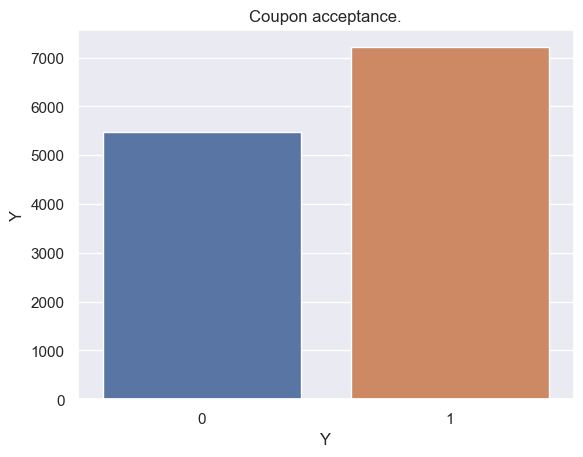

In [355]:
# Since column'Y' has values of 0 and 1, where one 1 means accepted coupon, I can just sum the values for the 
# column to figure out how many people accepted coupon.
yes_bar_coupon=bar_df['Y'].sum()
proportion_of_bar_coupons_accepted = yes_bar_coupon/len(bar_df.index)*100
print("The proportion of bar coupons that were accepted was",proportion_of_bar_coupons_accepted,"%")

sns.barplot(data=bar_df, x = "Y", y = data.coupon.value_counts())
sns.barplot(x=bar_df.Y.value_counts().index, y=bar_df.Y.value_counts())
plt.title('Coupon acceptance.')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The acceptance rate for those who went to a bar 3 or fewer times a month was 56.15951683097966 %
The acceptance rate for those who went to a bar more than 3 times a month was 62.24561403508771 %


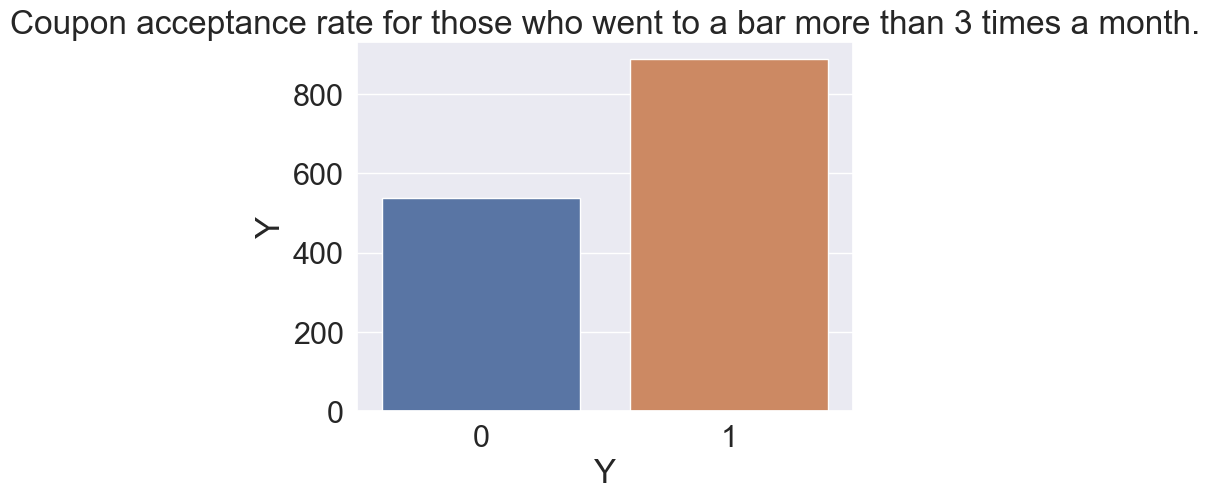

In [363]:
# Creating a data frame for drivers who go to bars less than 4 times a month.
bar_less = bar_df.copy()
values = ['4~8', 'gt8']
bar_less = bar_less[bar_less.Bar.isin(values) == False]

#creating a data for above drivers that accepted a coupon
bar_less_yes = bar_less.copy()
bar_less_yes = bar_less_yes[bar_less_yes.Y != 0]

#calculating acceptance for above drivers
acceptance_bar_less = len(bar_less_yes)/ len(bar_less.index)*100
print("The acceptance rate for those who went to a bar 3 or fewer times a month was", acceptance_bar_less, "%")

############################################

# Creating a data frame for drivers who go to bars more than 3 times a month.
bar_more = bar_df.copy()
values = ['never', 'less1', '1~3']
bar_more = bar_more[bar_more.Bar.isin(values) == False] 

#creating a data for above drivers that accepted a coupon
bar_more_yes = bar_more.copy()
bar_more_yes = bar_more_yes[bar_more_yes.Y != 0]

#calculating acceptance for above drivers
acceptance_bar_more = len(bar_more_yes)/ len(bar_more.index)*100
print("The acceptance rate for those who went to a bar more than 3 times a month was", acceptance_bar_more, "%")

sns.barplot(data= bar_more, x = "Y", y = bar_more.Y.value_counts())
sns.barplot(x=bar_more.Y.value_counts().index, y=bar_more.Y.value_counts())
plt.title('Coupon acceptance rate for those who went to a bar more than 3 times a month.')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is 54.10241766609556 %


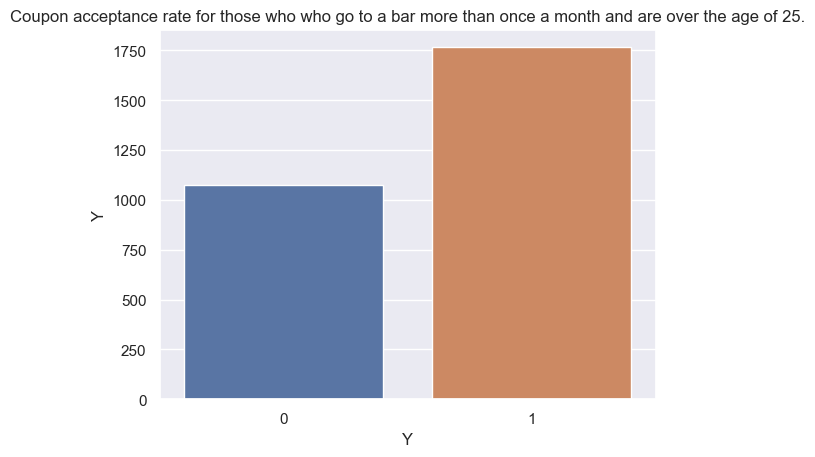

In [356]:
bar_df_more1_over25 = bar_df[(bar_df.Bar != 'never') & (bar_df.Bar != 'less1') & (bar_df.age != '20')& (bar_df.age != '21')]
acceptance_bar_df_more1_over25 = len(bar_df_more1_over25)/ len(k_df.index)*100
print("The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is", acceptance_bar_df_more1_over25, "%")

sns.barplot(data= bar_df_more1_over25, x = "Y", y = bar_df_more1_over25.Y.value_counts())
sns.barplot(x=bar_df_more1_over25.Y.value_counts().index, y=bar_df_more1_over25.Y.value_counts())
plt.title('Coupon acceptance rate for those who who go to a bar more than once a month and are over the age of 25.')
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 69.02404526166902 %


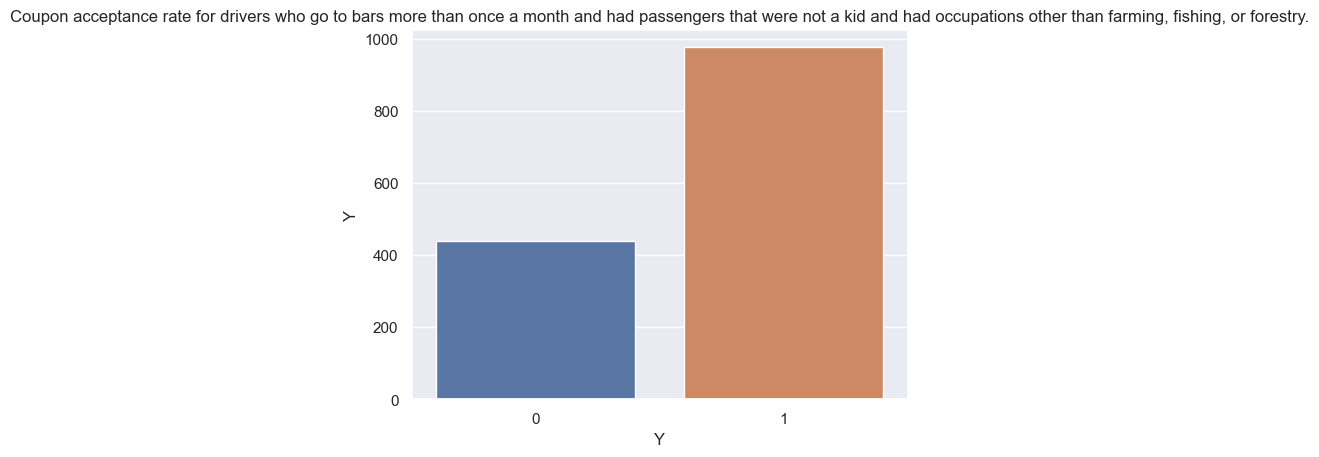

In [358]:
# Creating a data frame for drivers who go to bars at least once a month.
bar_more = bar_df.copy()
values = ['never', 'less1']
bar_more = bar_more[bar_more.Bar.isin(values) == False]

# Creating a data frame for above drivers who had passengers that were not a kid.
bar_more_noKid = bar_more.copy()
values = ['Alone', 'Kid(s)']
bar_more_noKid = bar_more_noKid[bar_more_noKid.passanger.isin(values) == False]

# Creating a data frame for above drivers who had occupations other than farming, fishing, or forestry.
bar_more_noKid_noFFF = bar_more_noKid.copy() 
bar_more_noKid_noFFF = bar_more_noKid_noFFF[bar_more_noKid_noFFF.occupation != "Farming Fishing & Forestry"]

#creating a data for above drivers that accepted a coupon
bar_more_noKid_noFFF_yes=bar_more_noKid_noFFF.copy()
bar_more_noKid_noFFF_yes = bar_more_noKid_noFFF_yes[bar_more_noKid_noFFF_yes.Y != 0]

#calculating acceptance for above drivers
acceptance_bar_more_noKid_noFFF = len(bar_more_noKid_noFFF_yes)/ len(bar_more_noKid_noFFF.index)*100
print("The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is", acceptance_bar_more_noKid_noFFF, "%")

sns.barplot(data= bar_more_noKid_noFFF, x = "Y", y = bar_more_noKid_noFFF.Y.value_counts())
sns.barplot(x=bar_more_noKid_noFFF.Y.value_counts().index, y=bar_more_noKid_noFFF.Y.value_counts())
plt.title('Coupon acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.')
sns.set(font_scale = 2)
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 62.21139045664443 %


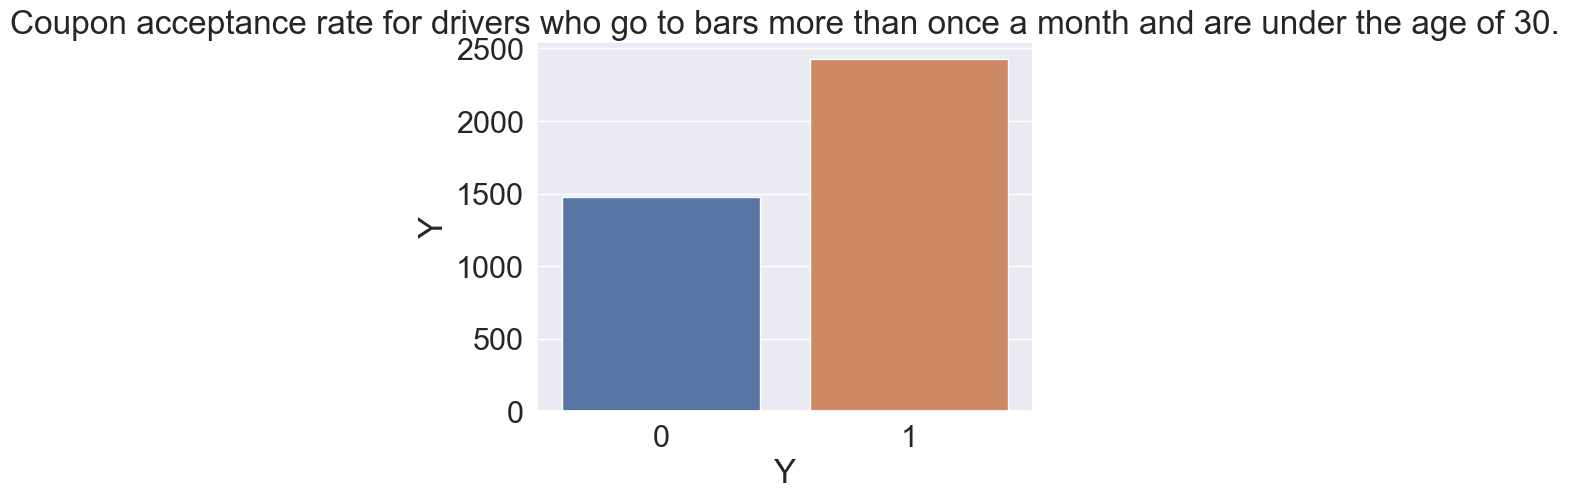

In [360]:
# Creating a data for drivers who go to bars more than once a month and are under the age of 30
bar_more_under30 = bar_more.copy()
values=[31,50,36,41,46]
bar_more_under30 = bar_more_under30[bar_more_under30.age.isin(values) == False]

# Creating a data for above drivers that accepted a coupon
bar_more_under30_yes = bar_more_under30.copy()
bar_more_under30_yes = bar_more_under30_yes[bar_more_under30_yes.Y == 1]

# Calculating acceptance for above drivers
acceptance_bar_more_under30 = len(bar_more_under30_yes.index)/len(bar_more_under30.index)*100
print("The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is", acceptance_bar_more_under30, "%")

sns.barplot(data= bar_more_under30, x = "Y", y = bar_more_under30.Y.value_counts())
sns.barplot(x=bar_more_under30.Y.value_counts().index, y=bar_more_under30.Y.value_counts())
plt.title('Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30.')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [279]:
# Based on these observations I hypothesize about drivers who accepted the bar coupon following:
# * Bar coupon was the 4th most used coupon.
# * The proportion of bar coupons that were accepted was 56.84%
# * The acceptance rate for those who went to a bar 3 or fewer times a month was 56.16%.
# * The acceptance rate for those who went to a bar more than 3 times a month was 62.25%.
# * The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to
#.  the all others is 54.10%.
# * The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and 
#.  had occupations other than farming, fishing, or forestry is 69.02%.
# * The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 62.21%.
# Recommendations:
# * Do more detailed research,
# * Concentrate marketing efforts on all above mentioned groups since their acceptance rate is over 50%, which is 
# high ROI. Target groups with specific to them adds.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# I will do research about drivers that have kids to figure out who was most responsive and why.

In [42]:
# Data for people with kids.
k_df = data.query("has_children==1")

# Data for people with kids that accepted a coupon.
k_df_y=k_df.query('Y==1')

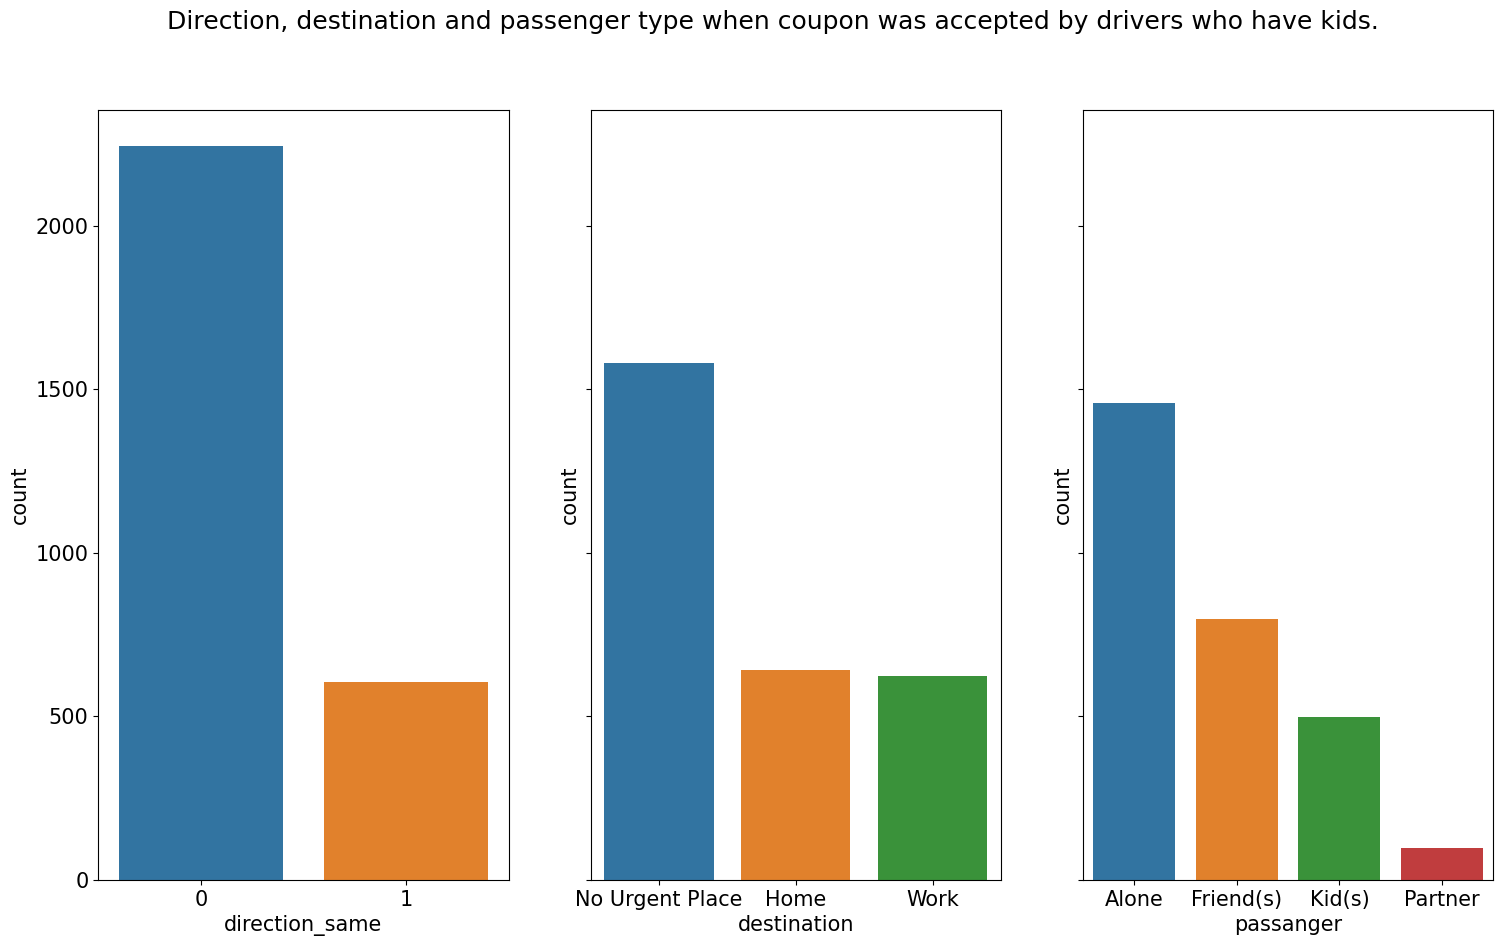

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Direction, destination and passenger type when coupon was accepted by drivers who have kids.')
plt.rcParams.update({'font.size': 20})
sns.countplot(ax=axes[0], data=k_df_y, x="direction_same", order=k_df_y["direction_same"].value_counts().index)
sns.countplot(ax=axes[1], data=k_df_y, x="destination", order=k_df_y["destination"].value_counts().index)
sns.countplot(ax=axes[2], data=k_df_y, x="passanger", order=k_df_y["passanger"].value_counts().index)
plt.show()

In [156]:
# For drivers with kids that accepted the coupon, the most popular conditions were:
# * the coupon wasn't in the same direction,
# * they had no urgent place to go,
# * they were driving alone.

### I want to know the acceptance rate for drivers who:
# * have kids,
# * accepted coupon,
# * the coupon wasn't in the same direction,
# * they had no urgent place to go,
# * they were driving alone
# compared to all drivers with kids.

k_df_y_dirOp_noUrgPl_alone = k_df_y[(k_df_y.direction_same != '1') & (k_df_y.destination == 'No Urgent Place') & (k_df_y.passanger == 'Alone')]
acceptance_k_df_y_dirOp_noUrgPl_alone = len(k_df_y_dirOp_noUrgPl_alone)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids and accepted coupon that wasn't in the same direction, had no urgent place to go and were driving alone compared to all drivers with kids is", acceptance_k_df_y_dirOp_noUrgPl_alone, "%")


The acceptance rate for drivers who have kids and accepted coupon that wasn't in the same direction, had no urgent place to go and were driving alone compared to all drivers with kids is 5.5206548638873025 %


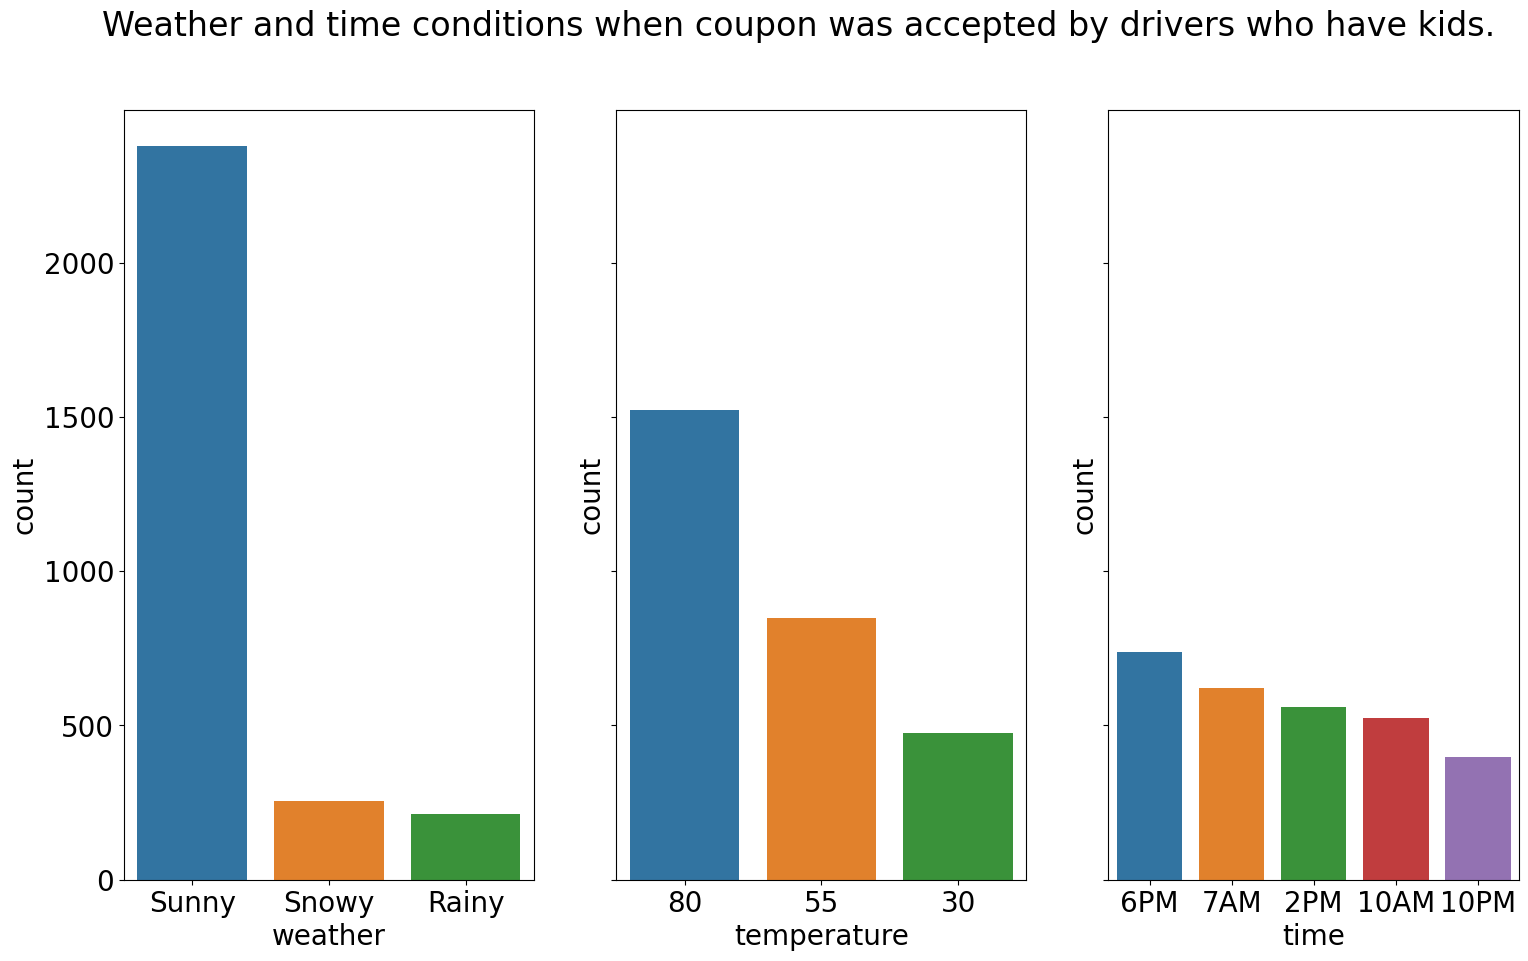

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Weather and time conditions when the coupon was accepted by drivers who have kids.')
plt.rcParams.update({'font.size': 15})
sns.countplot(ax=axes[0], data=k_df_y, x="weather", order=k_df_y["weather"].value_counts().index)
sns.countplot(ax=axes[1], data=k_df_y, x="temperature", order=k_df_y["temperature"].value_counts().index)
sns.countplot(ax=axes[2], data=k_df_y, x="time", order=k_df_y["time"].value_counts().index)
plt.show()

In [189]:
# For drivers with kids that accepted the coupon, the most popular conditions were:
# * sunny weather,
# * temperature 80,
# * time 6PM.

### I want to know the acceptance rate for drivers who have kids, accepted the coupon and had sunny weather compared to all drivers with kids.
### I want to know the acceptance rate for drivers who have kids, and accepted the coupon at 6PM compared to all drivers with kids.

k_df_y_sunny = k_df_y[(k_df_y.weather == 'Sunny')]
acceptance_k_df_y_sunny = len(k_df_y_sunny)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, accepted coupon and had sunny weather compared to all drivers with kids is", acceptance_k_df_y_sunny, "%")

k_df_y_6PM = k_df_y[(k_df_y.time == '6PM')]
acceptance_k_df_y_6PM = len(k_df_y_6PM)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids and accepted coupon at 6PM compared to all drivers with kids is", acceptance_k_df_y_6PM, "%")


The acceptance rate for drivers who have kids, accepted coupon and had sunny weather compared to all drivers with kids is 45.25033314296593 %
The acceptance rate for drivers who have kids and accepted coupon at 6PM compared to all drivers with kids is 14.068151532457643 %


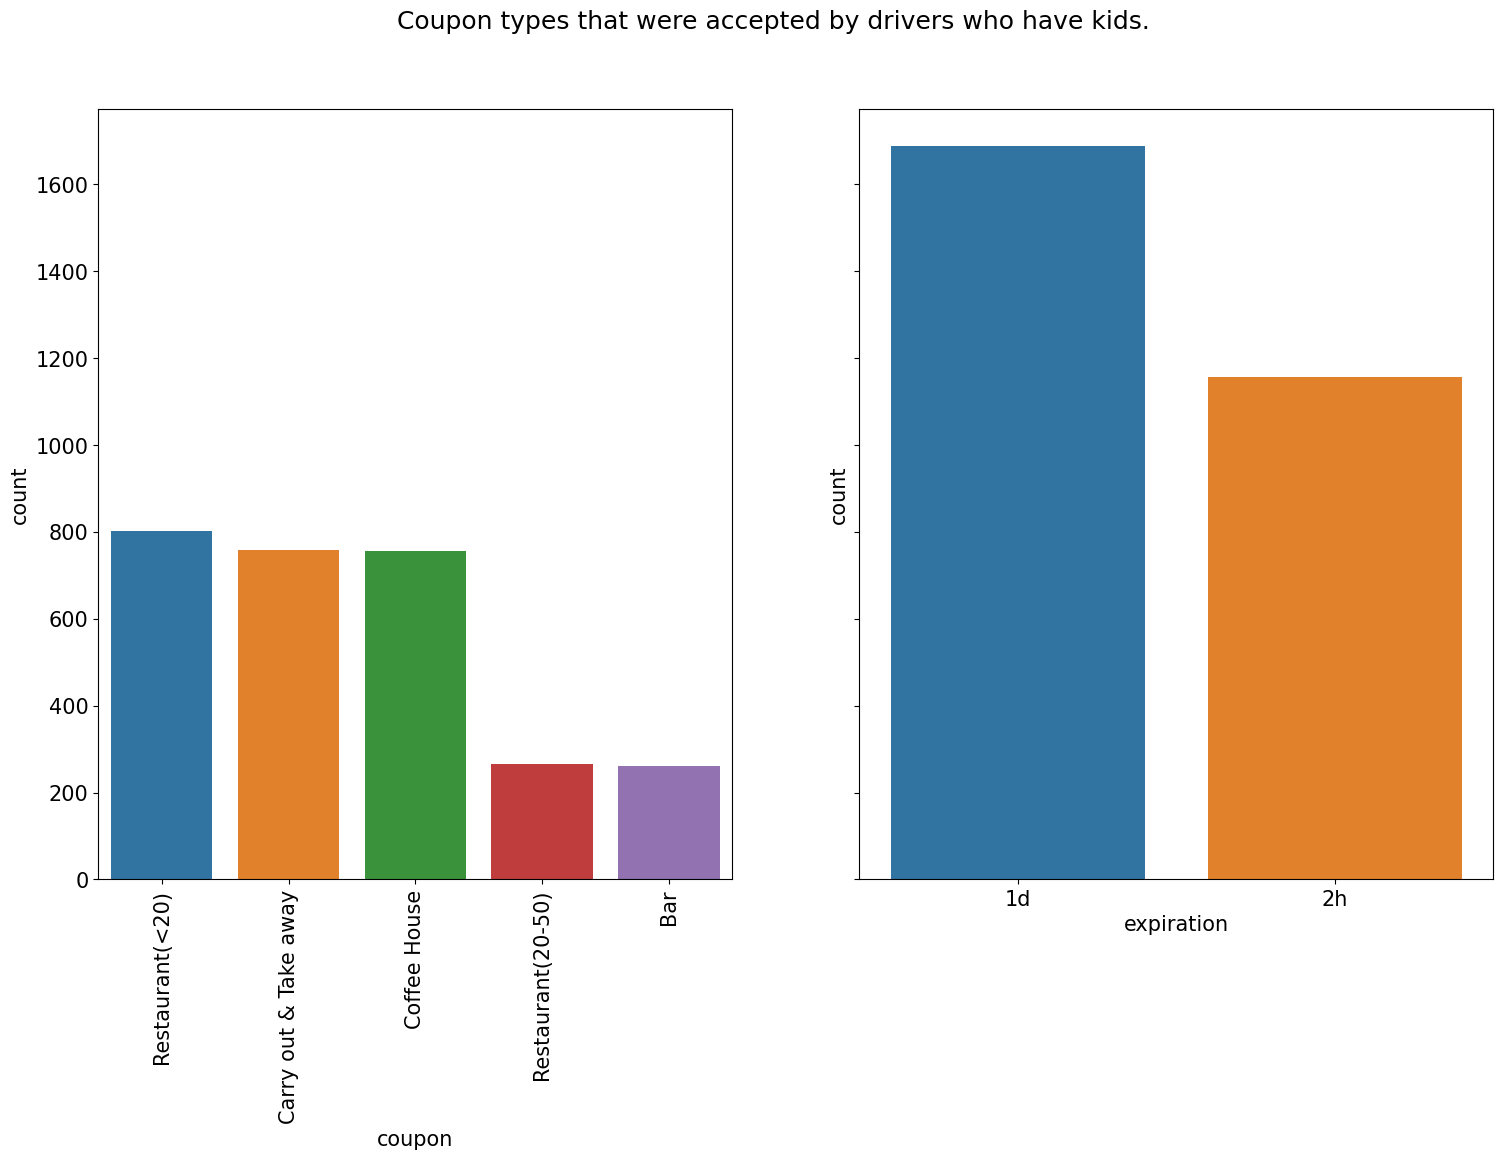

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
fig.suptitle('Coupon types that were accepted by drivers who have kids.')
plt.rcParams.update({'font.size': 15})
sns.countplot(ax=axes[0], data=k_df_y, x="coupon", order=k_df_y["coupon"].value_counts().index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[1], data=k_df_y, x="expiration", order=k_df_y["expiration"].value_counts().index)
plt.show()

In [192]:
# For drivers who have kids that accepted the coupon, the most popular conditions were coupons:
# * for restaurant(<20),
# * with 1d expiration.

### I want to know the acceptance rate for drivers who have kids, and accepted the coupon for restaurant(<20) 
#   that expired in 1d compared to all drivers with kids.

k_df_y_Rest20_1d = k_df_y[(k_df_y.coupon == 'Restaurant(<20)') & (k_df_y.expiration == '1d')]
acceptance_k_df_y_Rest20_1d = len(k_df_y_Rest20_1d )/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids and accepted restaurant(<20) coupon with 1d expiration compared to all drivers with kids is", acceptance_k_df_y_Rest20_1d, "%")


The acceptance rate for drivers who have kids and accepted restaurant(<20) coupon with 1d expiration compared to all drivers with kids is 8.623643632210165 %


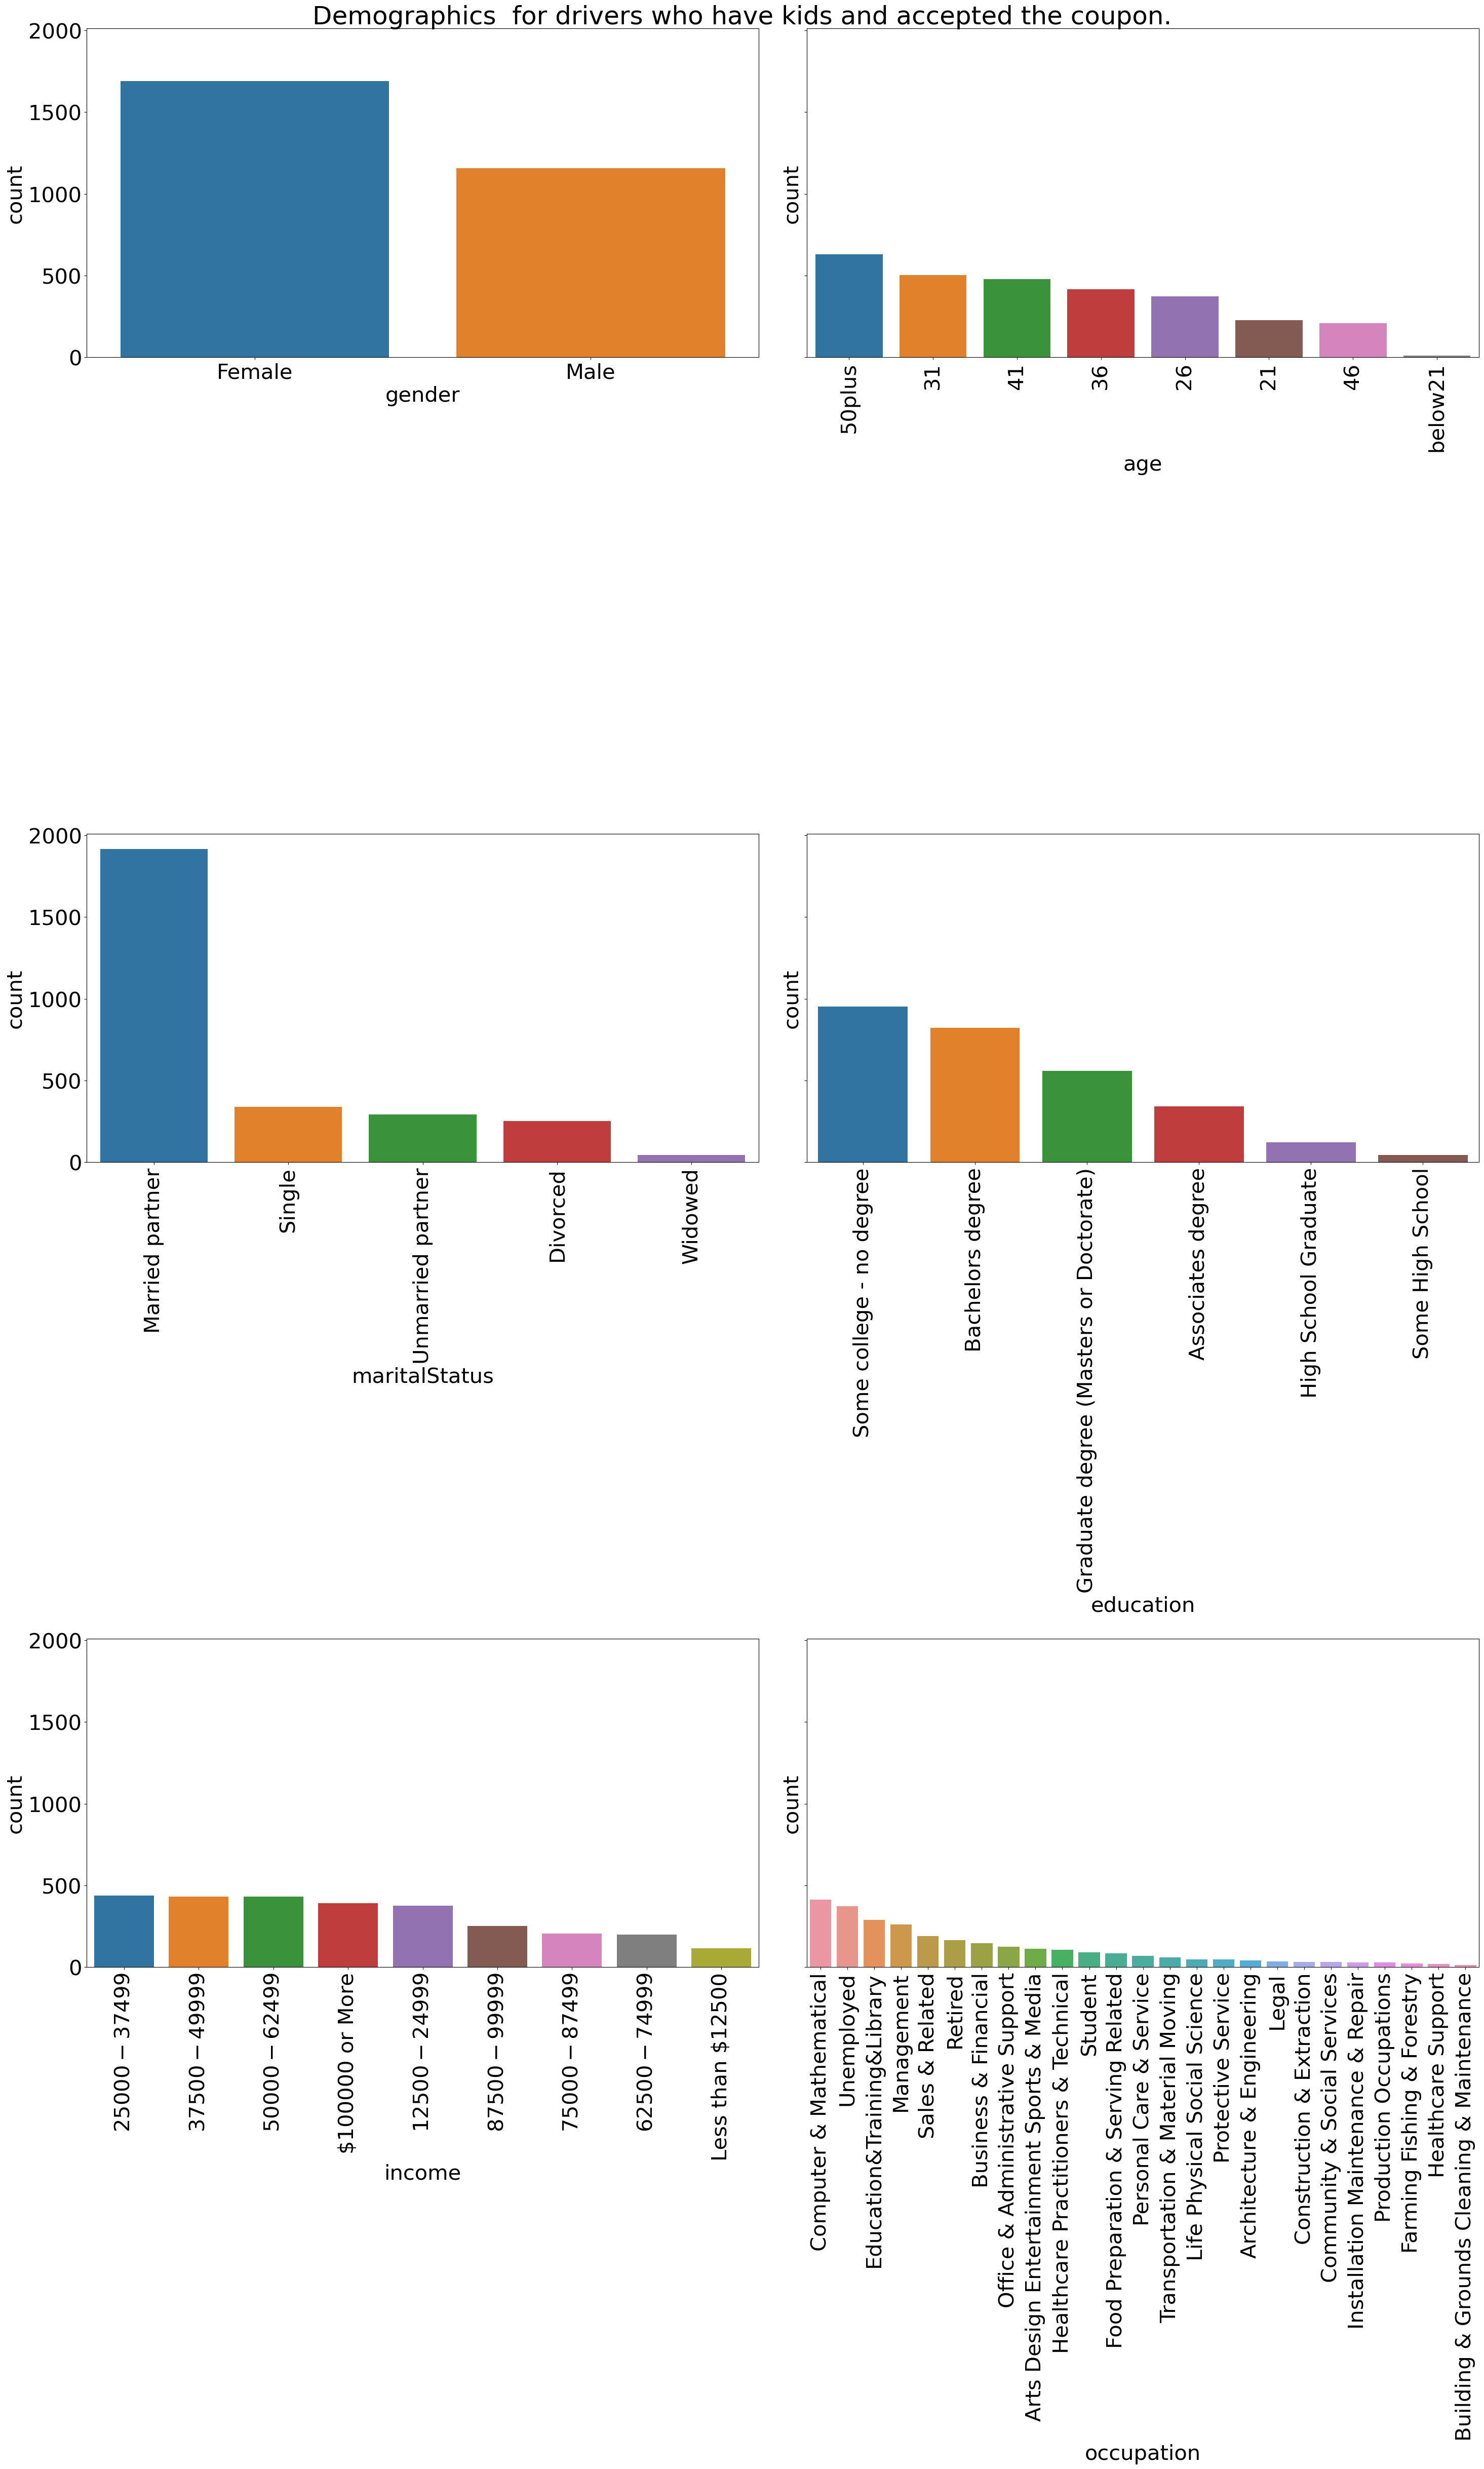

In [142]:
fig, axes = plt.subplots(3, 2, figsize=(30, 50), sharey=True)
plt.rcParams.update({'font.size': 30})
fig.suptitle('Demographics  for drivers who have kids and accepted the coupon.')
sns.countplot(ax=axes[0, 0], data=k_df_y, x="gender", order=k_df_y["gender"].value_counts().index)
sns.countplot(ax=axes[0, 1], data=k_df_y, x="age", order=k_df_y["age"].value_counts().index)
axes[0, 1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[1, 0], data=k_df_y, x="maritalStatus", order=k_df_y["maritalStatus"].value_counts().index)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[1, 1], data=k_df_y, x="education", order=k_df_y["education"].value_counts().index)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[2, 0], data=k_df_y, x="income", order=k_df_y["income"].value_counts().index)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[2, 1], data=k_df_y, x="occupation", order=k_df_y["occupation"].value_counts().index)
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [215]:
# The drivers who have kids and accepted the coupon had displayed following demographics the highest:
# * gender: female,
# * age: 50+''
# * maritalStatus: Married partner,
# * education: Some college - no degree,
# * income: 25000 - 37499,
# * occupation: Computer and Mathematical.

### I want to know the acceptance rate for drivers who have kids, and accepted the coupon that:
# * are female,
# * are married/ partner,
# * have some college - no degree.
#   compared to all drivers with kids.

k_df_y_f_m_someC = k_df_y[(k_df_y.gender == 'Female') & (k_df_y. maritalStatus == 'Married partner')  & (k_df_y. education == 'Some college - no degree')]
acceptance_k_df_y_f_m_someC = len(k_df_y_f)/ len(k_df.index)*100
print("The acceptance rate for drivers who are female, married, and have some college, kids and accepted coupon compared to all drivers with kids is", acceptance_k_df_y_f_m_someC, "%")


The acceptance rate for drivers who are female, married, and have some college, kids and accepted coupon compared to all drivers with kids is 6.244051018465639 %


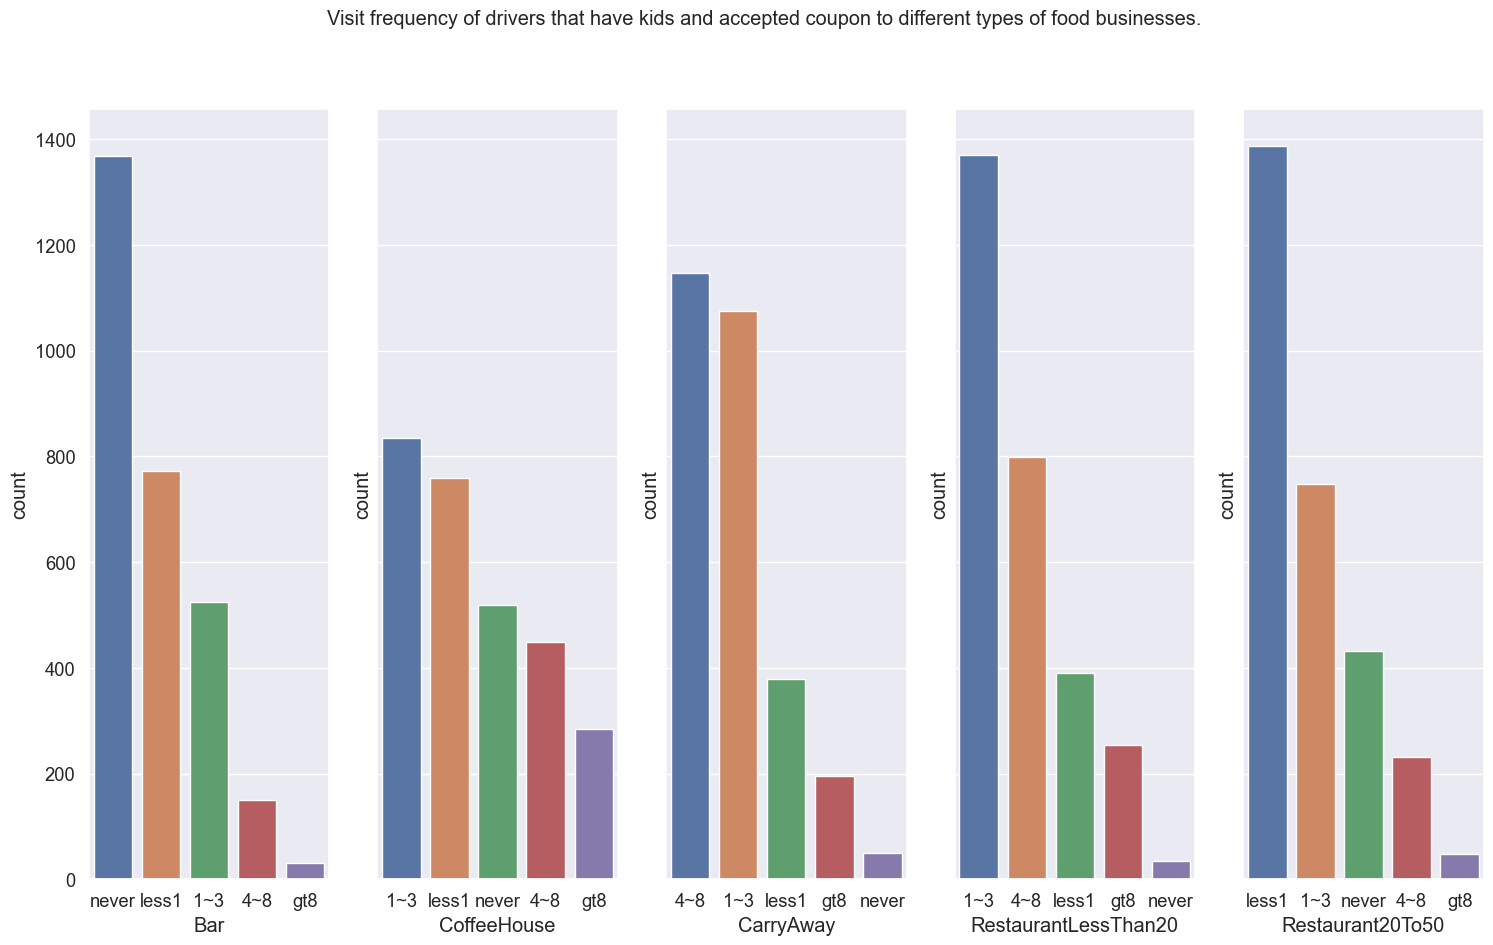

In [216]:
fig, axes = plt.subplots(1, 5, figsize=(18, 10), sharey=True)
plt.rcParams.update({'font.size': 12})
fig.suptitle('Visit frequency of drivers that have kids and accepted coupon to different types of food businesses.')
sns.countplot(ax=axes[0], data=k_df_y, x="Bar", order=k_df_y["Bar"].value_counts().index)
sns.countplot(ax=axes[1], data=k_df_y, x="CoffeeHouse", order=k_df_y["CoffeeHouse"].value_counts().index)
sns.countplot(ax=axes[2], data=k_df_y, x="CarryAway", order=k_df_y["CarryAway"].value_counts().index)
sns.countplot(ax=axes[3], data=k_df_y, x="RestaurantLessThan20", order=k_df_y["RestaurantLessThan20"].value_counts().index)
sns.countplot(ax=axes[4], data=k_df_y, x="Restaurant20To50", order=k_df_y["Restaurant20To50"].value_counts().index)
plt.show()


In [226]:
# The drivers who have kids and accepted the coupon had displayed following:
# * the most Bar coupons were accepted by drivers that never go to Bar
# * the most Coffee House coupons were accepted by drivers that go to Coffee House 1-3/month.
# * the most CarryAway coupons were accepted by drivers that order food 4-8 times/month.
# * the most inexpensive restaurant coupons were accepted by drivers that go there 1-3 times/month.
# * the most expensive restaurant coupons were accepted by drivers that go there less than once a month.

### I want to know the acceptance rate for drivers who have kids, never go to bars, and accepted the Bar coupon 
#   compared to all drivers with kids.
k_df_y_b = k_df_y[(k_df_y.Bar == 'never')]
acceptance_k_df_y_b = len(k_df_y_b)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, never go to bars, and accepted the Bar coupon compared to all drivers with kids is", acceptance_k_df_y_b, "%")


### I want to know the acceptance rate for drivers who have kids, go to Coffee house 1-3 times a month, and 
#   accepted the CoffeeHouse coupon compared to all drivers with kids.
k_df_y_ch = k_df_y[(k_df_y.CoffeeHouse == '1~3')]
acceptance_k_df_y_ch = len(k_df_y_ch)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, go to Coffee house 1-3 times a month, and accepted the CoffeeHouse coupon compared to all drivers with kids is", acceptance_k_df_y_ch, "%")


### I want to know the acceptance rate for drivers who have kids, use CarryAway 4-8 times a month, and 
#   accepted the CarryAway coupon compared to all drivers with kids.
k_df_y_ca = k_df_y[(k_df_y.CarryAway == '4~8')]
acceptance_k_df_y_ca = len(k_df_y_ca)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, use CarryAway 4-8 times a month, and accepted the CarryAway coupon compared to all drivers with kids is", acceptance_k_df_y_ca, "%")

### I want to know the acceptance rate for drivers who have kids, go to inexpensive restaurant 1-3 times a month, and 
#   accepted the RestaurantLessThan20 coupon compared to all drivers with kids.
k_df_y_ir = k_df_y[(k_df_y.RestaurantLessThan20 == '1~3')]
acceptance_k_df_y_ir = len(k_df_y_ir)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, go to inexpensive restaurant 1-3 times a month, and accepted the RestaurantLessThan20 coupon compared to all drivers with kids is", acceptance_k_df_y_ir, "%")

### I want to know the acceptance rate for drivers who have kids, go to expensive restaurant less than once a month,
#.  and accepted the Restaurant20to50 coupon compared to all drivers with kids.
k_df_y_er = k_df_y[(k_df_y.Restaurant20To50 == 'less1')]
acceptance_k_df_y_er = len(k_df_y_er)/ len(k_df.index)*100
print("The acceptance rate for drivers who have kids, go to expensive restaurant less than once a month, and accepted the Restaurant20to50 coupon compared to all drivers with kids is", acceptance_k_df_y_er, "%")



The acceptance rate for drivers who have kids, never go to bars, and accepted the Bar coupon compared to all drivers with kids is 26.023224823910144 %
The acceptance rate for drivers who have kids, go to Coffee house 1-3 times a month, and accepted the CoffeeHouse coupon compared to all drivers with kids is 15.89567865981344 %
The acceptance rate for drivers who have kids, use CarryAway 4-8 times a month, and accepted the CarryAway coupon compared to all drivers with kids is 21.816105082809823 %
The acceptance rate for drivers who have kids, go to inexpensive restaurant 1-3 times a month, and accepted the RestaurantLessThan20 coupon compared to all drivers with kids is 26.080335046640013 %
The acceptance rate for drivers who have kids, go to expensive restaurant less than once a month, and accepted the Restaurant20to50 coupon compared to all drivers with kids is 26.40395964210927 %


In [310]:
# Based on these observations I hypothesize about drivers with kids that the highest coupon acceptance rate
# is for following conditions (not necesserly clubbed together):
# * the coupon wasn't in the same direction,
# * they had no urgent place to go,
# * they were driving alone,
# * weather was sunny,
# * temperature was 80,
# * time was 6PM,
# * coupons for restaurant(<20),
# * coupons with 1d expiration,
# * gender: female,
# * age: 50+,
# * maritalStatus: Married partner,
# * education: Some college - no degree,
# * income: 25000 - 37499,
# * occupation: Computer and Mathematical,
# * the most Bar coupons were accepted by drivers that never go to Bar,
# * the most Coffee House coupons were accepted by drivers that go to Coffee House 1-3/month,
# * the most CarryAway coupons were accepted by drivers that order food 4-8 times/month,
# * the most inexpensive restaurant coupons were accepted by drivers that go there 1-3 times/month,
# * the most expensive restaurant coupons were accepted by drivers that go there less than once a month.

# All above information was very obvious from created above charts. More data digging can easily show a better story.

#Some specific examples of drivers disclosed following:
# * The acceptance rate for drivers who have kids and accepted coupon that wasn't in the same direction, had no urgent
#.  place to go and were driving alone compared to all drivers with kids is 5.52%.
# * The acceptance rate for drivers who have kids, accepted coupon and had sunny weather compared to all drivers with 
#   kids is 45.25033314296593 % The acceptance rate for drivers who have kids and accepted coupon at 6PM compared to 
#.  all drivers with kids is 14.07 %.
# * The acceptance rate for drivers who have kids and accepted restaurant(<20) coupon with 1d expiration compared to
#   all drivers with kids is 8.62 %.
# * The acceptance rate for drivers who are female, married, and have some college, kids and accepted coupon compared
#   to all drivers with kids is 6.24%.
# * The acceptance rate for drivers who have kids, never go to bars, and accepted the Bar coupon compared to all
#   drivers with kids is 26.02%.
# * The acceptance rate for drivers who have kids, go to Coffee house 1-3 times a month, and accepted the CoffeeHouse
#.  coupon compared to all drivers with kids is 15.9%.
# * The acceptance rate for drivers who have kids, use CarryAway 4-8 times a month, and accepted the CarryAway coupon
#   compared to all drivers with kids is 21.82%
# * The acceptance rate for drivers who have kids, go to inexpensive restaurant 1-3 times a month, and accepted the 
#.  RestaurantLessThan20 coupon compared to all drivers with kids is 26.08%
# * The acceptance rate for drivers who have kids, go to expensive restaurant less than once a month, and accepted 
#.  the Restaurant20to50 coupon compared to all drivers with kids is 26.40%

# Next steps and recommendations:
# Based on above findings Amazon can charge higher rates for specific dedmographics, times of day, location and 
# weather. Marketing campaigns can be geared towards specific groups to increase the coupon acceptance rate. 3 groups
# that had a great ROI for family type were:
# * The acceptance rate for drivers who have kids, go to expensive restaurant less than once a month, and accepted 
#.  the Restaurant20to50 coupon compared to all drivers with kids is 26.40%
# * The acceptance rate for drivers who have kids, go to inexpensive restaurant 1-3 times a month, and accepted
#.  the RestaurantLessThan20 coupon compared to all drivers with kids is 26.08%
# * The acceptance rate for drivers who have kids, never go to bars, and accepted the Bar coupon compared to all 
#.  drivers with kids is 26.02%.